   index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0      0   70    1                4  130          322             0   
1      1   67    0                3  115          564             0   
2      2   57    1                2  124          261             0   
3      3   64    1                4  128          263             0   
4      4   74    0                2  120          269             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     109                0            2.4            2   
1            2     160                0            1.6            2   
2            0     141                0            0.3            1   
3            0     105                1            0.2            2   
4            2     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7    

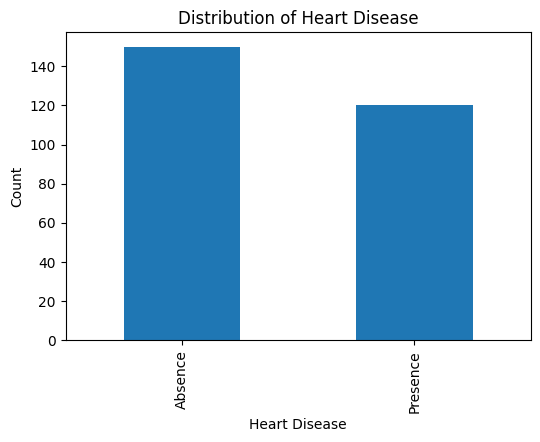

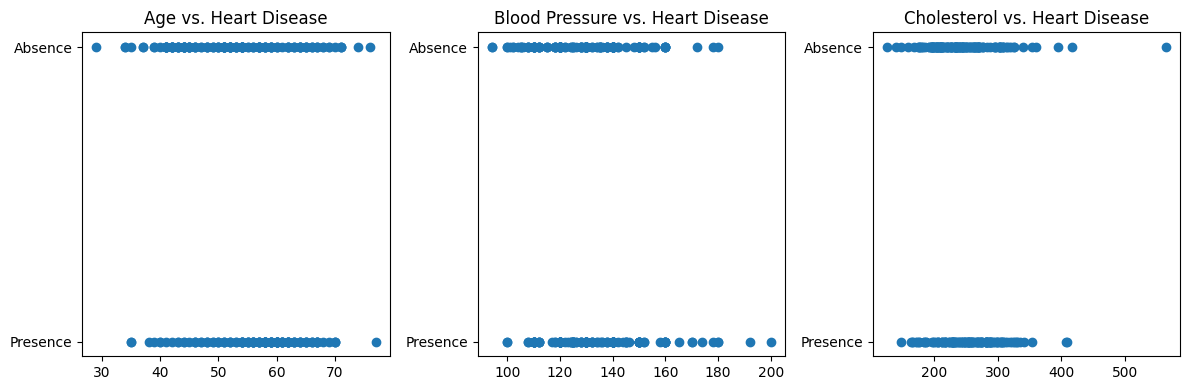

Accuracy: 0.63
Confusion Matrix:
[[25  8]
 [12  9]]
Classification Report:
              precision    recall  f1-score   support

     Absence       0.68      0.76      0.71        33
    Presence       0.53      0.43      0.47        21

    accuracy                           0.63        54
   macro avg       0.60      0.59      0.59        54
weighted avg       0.62      0.63      0.62        54



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('Heart_Disease_Prediction.csv')

print(df.head())
print(df.info())
print(df.describe())

plt.figure(figsize=(6, 4))
df['Heart Disease'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['Age'], df['Heart Disease'])
plt.title('Age vs. Heart Disease')

plt.subplot(1, 3, 2)
plt.scatter(df['BP'], df['Heart Disease'])
plt.title('Blood Pressure vs. Heart Disease')

plt.subplot(1, 3, 3)
plt.scatter(df['Cholesterol'], df['Heart Disease'])
plt.title('Cholesterol vs. Heart Disease')

plt.tight_layout()
plt.show()

X = df[['Age', 'BP', 'Cholesterol']]  # Features
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

